In [1]:
import numpy as np

import pandas as pd
import seaborn as sb

from keras.models import Sequential # Class
from keras.layers import Dense # Class

import matplotlib.pyplot as plt

%matplotlib inline

Using TensorFlow backend.


In [2]:
df = pd.read_csv('./pima.csv',
            names = ["pregnant", "plasma", "pressure", "thickness", "insulin", "BMI", "pedigree", "age", "class"])
print(type(df))
print(df.head(5))
print(df.info())

<class 'pandas.core.frame.DataFrame'>
   pregnant  plasma  pressure  thickness  insulin   BMI  pedigree  age  class
0         6     148        72         35        0  33.6     0.627   50      1
1         1      85        66         29        0  26.6     0.351   31      0
2         8     183        64          0        0  23.3     0.672   32      1
3         1      89        66         23       94  28.1     0.167   21      0
4         0     137        40         35      168  43.1     2.288   33      1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnant     768 non-null int64
plasma       768 non-null int64
pressure     768 non-null int64
thickness    768 non-null int64
insulin      768 non-null int64
BMI          768 non-null float64
pedigree     768 non-null float64
age          768 non-null int64
class        768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [3]:
print(df.describe())

         pregnant      plasma    pressure   thickness     insulin         BMI  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

         pedigree         age       class  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%   

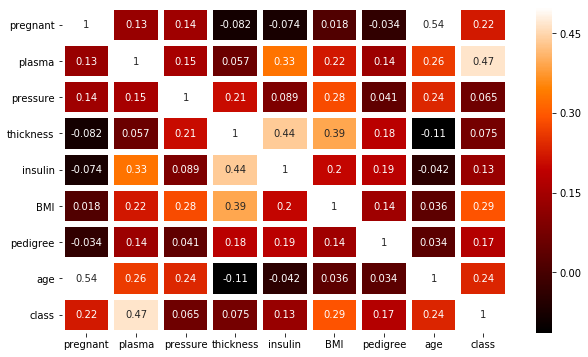

In [4]:
# https://matplotlib.org/users/colormaps.html
colormap = plt.cm.gist_heat   # 그래프의 색상 구성을 정합니다. 열그래프, gist_heat, autumn, cool
plt.figure(figsize=(10,6))      #그래프의 크기를 정합니다.

# df.corr(): 상관관계 분석 데이터
# linewidths=0.1: 상자의 외곽선 두께
# vmax=0.1: 밝기, 0에 가까울수록 밝은 색으로 표시됨.
# cmap=colormap: 적용할 색상값 지정, 기본값 지정,
# linecolor='white': 상자의 외곽선 색깔
# annot=True: Annotation의 약자로 각 셀의 값을 표시할지의 여부 결정
sb.heatmap(df.corr(),linewidths=5,vmax=0.5, cmap=colormap, linecolor='white', annot=True)
plt.show()  # 챠트 출력

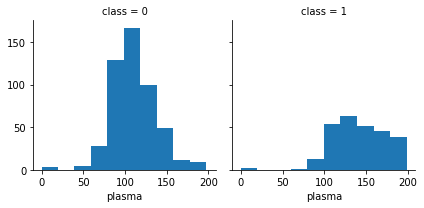

In [11]:
grid = sb.FacetGrid(df, col='class') 
# col: Y축 값, 0 또는 1
# 히스토그램 그래프 출력, plasma: 공복 혈당 농도를 x 좌표로 사용
grid.map(plt.hist, 'plasma', bins=10) 
# 10개 구간으로 분리
plt.show()

In [14]:
# 검증데이터와 테스트 데이터 조정

data = np.loadtxt('./pima.csv', delimiter=",")
print('total:', data.shape)
x=data[0:668, 0:8]         # 총 768건중 668 건의 학습 데이터, 668행 8열의 구성
y=data[0:668, 8:]  
print(x.shape)
print(y.shape)

x_val=data[668:718, 0:8]  # 50 건의 검증 데이터, 50행 8열의 구성
y_val=data[668:718, 8:]  
print(x_val.shape)
print(y_val.shape)

# TEST 데이터
#x_test=data[718:, 0:8]     # 50 건의 테스트 데이터, 50행 8열의 구성
#y_test=data[718:, 8:]  
#print(x_test.shape)
#print(y_test.shape)

total: (768, 9)
(668, 8)
(668, 1)
(50, 8)
(50, 1)


In [20]:
# 신규비율 검증데이터와 테스트 데이터 조정

data = np.loadtxt('./pima.csv', delimiter=",")
print('total:', data.shape)
x=data[0:568, 0:8]         # 총 768건중 568 건의 학습 데이터, 568행 8열의 구성
y=data[0:568, 8:]  
print(x.shape)
print(y.shape)

x_val=data[568:718, 0:8]  # 150 건의 검증 데이터, 150행 8열의 구성
y_val=data[568:718, 8:]  
print(x_val.shape)
print(y_val.shape)

# TEST 데이터
x_test=data[718:, 0:8]     # 150 건의 테스트 데이터, 150행 8열의 구성
y_test=data[718:, 8:]  
#print(x_test.shape)
#print(y_test.shape)

total: (768, 9)
(568, 8)
(568, 1)
(150, 8)
(150, 1)


In [21]:
from keras.callbacks import EarlyStopping

# 두개의 은닉층을 사용하는 경우
model = Sequential()
# 입력값 8, 출력 노드 128개, 활성화 함수 : linear

model.add(Dense(128, input_shape=(8,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile( optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='loss', patience=10)

hist = model.fit(x, y, validation_data = (x_val, y_val), epochs=1000, batch_size=10, callbacks=[early_stopping])
#hist = model.fit( x, y, validation_data=(x_val,y_val), epochs=1000, batch_size=10)

Train on 568 samples, validate on 150 samples
Epoch 1/1000
568/568 [==============================] - 0s 768us/step - loss: 1.0192 - acc: 0.6549 - val_loss: 0.6732 - val_acc: 0.6867
Epoch 2/1000
568/568 [==============================] - 0s 169us/step - loss: 0.6287 - acc: 0.6725 - val_loss: 0.6239 - val_acc: 0.6200
Epoch 3/1000
568/568 [==============================] - 0s 164us/step - loss: 0.6123 - acc: 0.6849 - val_loss: 0.6741 - val_acc: 0.5800
Epoch 4/1000
568/568 [==============================] - 0s 222us/step - loss: 0.5915 - acc: 0.6831 - val_loss: 0.6528 - val_acc: 0.5867
Epoch 5/1000
568/568 [==============================] - 0s 181us/step - loss: 0.5840 - acc: 0.6901 - val_loss: 0.6819 - val_acc: 0.5733
Epoch 6/1000
568/568 [==============================] - 0s 180us/step - loss: 0.5985 - acc: 0.6813 - val_loss: 0.6486 - val_acc: 0.6333
Epoch 7/1000
568/568 [==============================] - 0s 158us/step - loss: 0.5729 - acc: 0.6954 - val_loss: 0.6596 - val_acc: 0.5667
Ep

568/568 [==============================] - 0s 155us/step - loss: 0.4954 - acc: 0.7535 - val_loss: 0.6581 - val_acc: 0.7200
Epoch 61/1000
568/568 [==============================] - 0s 157us/step - loss: 0.5055 - acc: 0.7676 - val_loss: 0.7119 - val_acc: 0.6667
Epoch 62/1000
568/568 [==============================] - 0s 153us/step - loss: 0.4921 - acc: 0.7588 - val_loss: 0.6359 - val_acc: 0.6800
Epoch 63/1000
568/568 [==============================] - 0s 151us/step - loss: 0.4983 - acc: 0.7500 - val_loss: 0.6083 - val_acc: 0.7267
Epoch 64/1000
568/568 [==============================] - 0s 143us/step - loss: 0.4974 - acc: 0.7482 - val_loss: 0.7099 - val_acc: 0.7267
Epoch 65/1000
568/568 [==============================] - 0s 141us/step - loss: 0.4847 - acc: 0.7553 - val_loss: 0.6365 - val_acc: 0.6800
Epoch 66/1000
568/568 [==============================] - 0s 143us/step - loss: 0.4784 - acc: 0.7535 - val_loss: 0.7041 - val_acc: 0.7200
Epoch 67/1000
568/568 [==============================] 

In [22]:
model.summary() # 가중치 1개 + bias 1개
# 파라메터
# 하이퍼 파라메터 : 학습에 사용되는 파라메터

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 128)               1152      
_________________________________________________________________
dense_12 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_13 (Dense)             (None, 30)                1950      
_________________________________________________________________
dense_14 (Dense)             (None, 10)                310       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 11        
Total params: 11,679
Trainable params: 11,679
Non-trainable params: 0
_________________________________________________________________


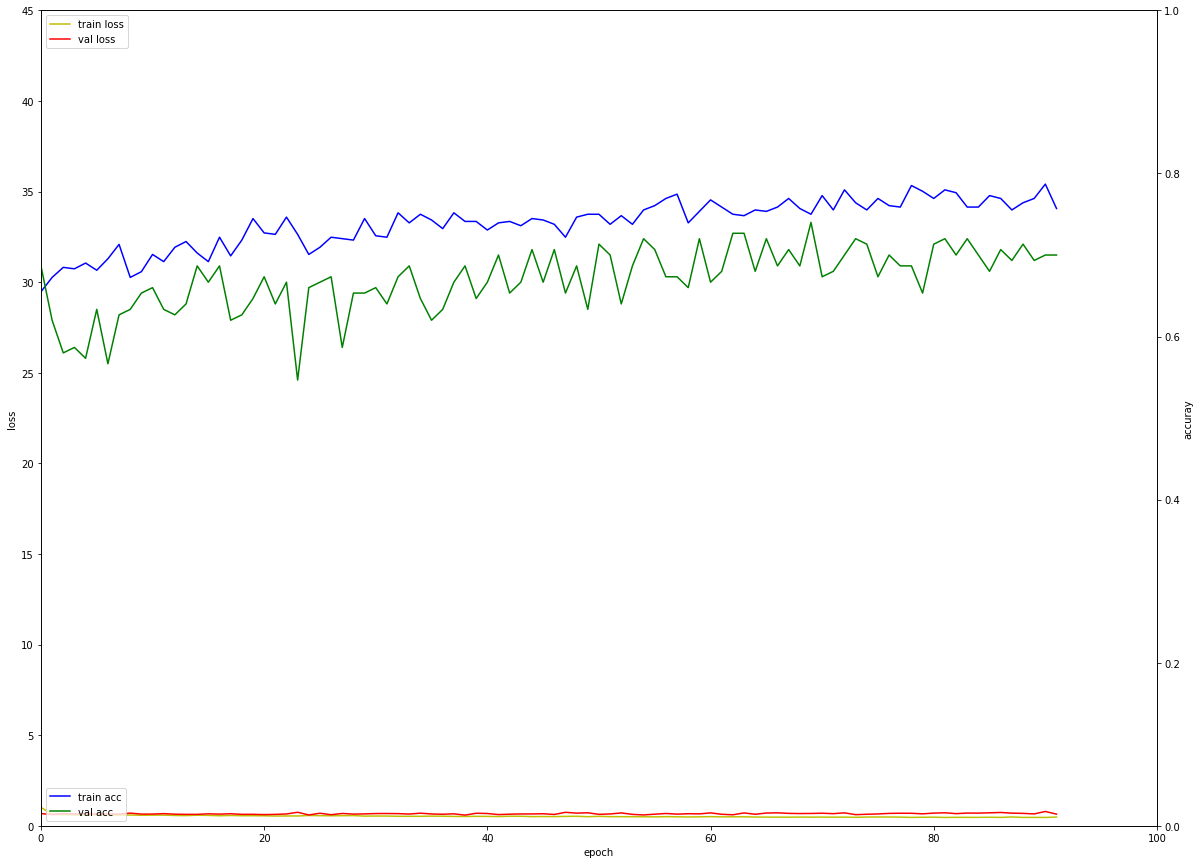

In [24]:
fig, loss_ax = plt.subplots()
# plt.figure(figsize=(6,4)) # ERROR
#fig.set_size_inches(10, 5)  # 챠트 크기 설정
fig.set_size_inches(20, 15)  # 챠트 크기 설정 가로*세로

acc_ax = loss_ax.twinx()  # 오른쪽 y 출 설정

loss_ax.plot(hist.history['loss'], 'y', label='train loss')  # 훈련 오차
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')  # 검증 오차
loss_ax.set_xlim([0.0, 100.0]) # 값을 반영하여 변경
loss_ax.set_ylim([0.0, 45.0]) # 값을 반영하여 변경

acc_ax.plot(hist.history['acc'], 'b', label='train acc')  # 훈련 정확도
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')  # 검증 정확도
acc_ax.set_ylim([0.0, 1.0])  # 오른쪽 y축

loss_ax.set_xlabel('epoch')  #  x축 레이블
loss_ax.set_ylabel('loss')  #   y축 오차 레이블
acc_ax.set_ylabel('accuray') #   y축 정확도 레이블

loss_ax.legend(loc='upper left')  # 오차레이블 출력 위치
acc_ax.legend(loc='lower left')   # 정확도 레이블 출력 위치

plt.show()

In [26]:
test_loss, test_acc = model.evaluate(x_test,y_test, batch_size=10)
print('손실값 : ', test_loss, ' / 정확도 : ', (test_acc*100), '%')

50/50 [==============================] - 0s 160us/step
손실값 :  0.566176849603653  / 정확도 :  73.99999976158142 %
